In [2]:
import pandas as pd
import matplotlib.pyplot as plt  
from yellowbrick.cluster import 
 
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score


In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/ML%20Pemula/Mall_Customers.csv')
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.describe()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


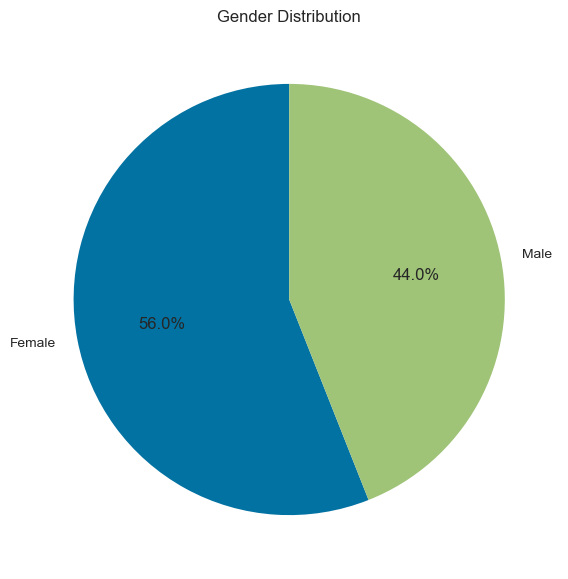

In [8]:
plt.figure(figsize=(7, 7))
plt.pie(df['Gender'].value_counts(), labels=['Female', 'Male'], autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.show()


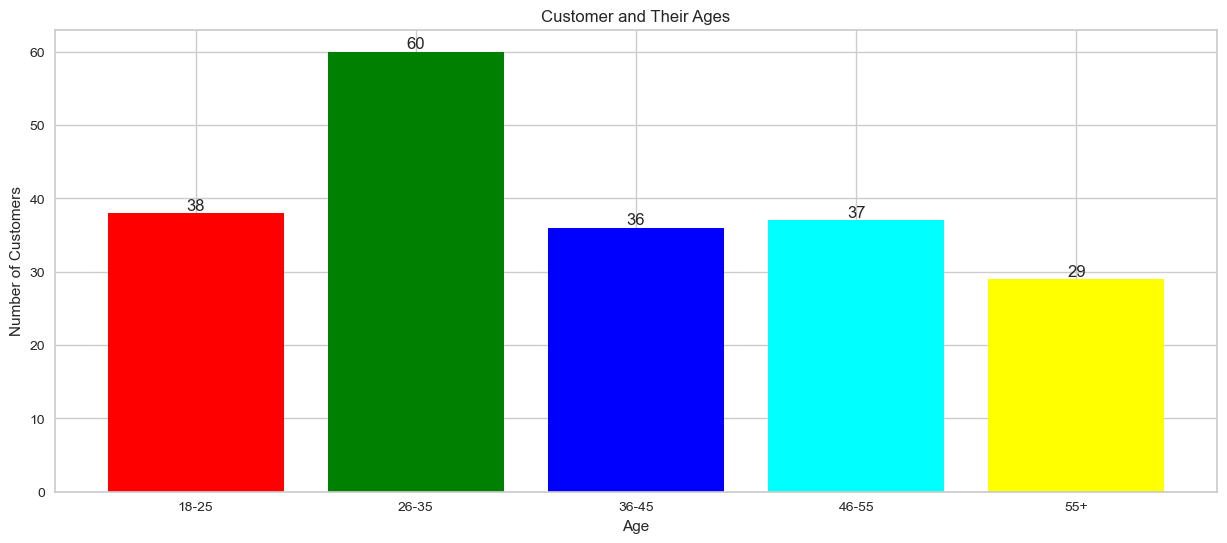

In [9]:
age18_25 = df.Age[(df.Age >= 18) & (df.Age <= 25)]
age26_35 = df.Age[(df.Age >= 26) & (df.Age <= 35)]
age36_45 = df.Age[(df.Age >= 36) & (df.Age <= 45)]
age46_55 = df.Age[(df.Age >= 46) & (df.Age <= 55)]
age55above = df.Age[df.Age >= 56]
 
x = ["18-25", "26-35", "36-45", "46-55", "55+"]
y = [len(age18_25.values), len(age26_35.values), len(age36_45.values), len(age46_55.values), len(age55above.values)]
 
plt.figure(figsize=(15, 6))
plt.bar(x, y, color=['red', 'green', 'blue', 'cyan', 'yellow'])
plt.title("Customer and Their Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customers")
 
for i in range(len(x)):
  plt.text(i, y[i], y[i], ha='center', va='bottom')
 
plt.show()


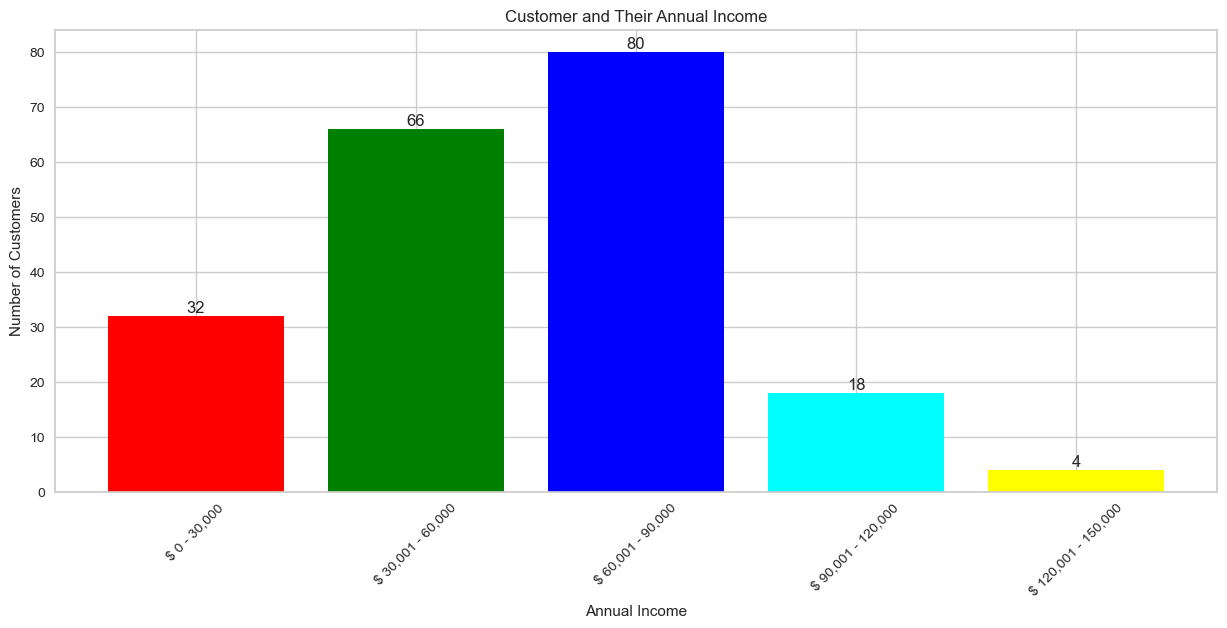

In [11]:
ai0_30 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 0) & (df["Annual Income (k$)"] <= 30)]
ai31_60 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 31) & (df["Annual Income (k$)"] <= 60)]
ai61_90 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 61) & (df["Annual Income (k$)"] <= 90)]
ai91_120 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 91) & (df["Annual Income (k$)"] <= 120)]
ai121_150 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 121) & (df["Annual Income (k$)"] <= 150)]
 
aix = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 150,000"]
aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]
 
plt.figure(figsize=(15, 6))
plt.bar(aix, aiy, color=['red', 'green', 'blue', 'cyan', 'yellow'])
plt.title("Customer and Their Annual Income")
plt.xlabel("Annual Income")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)  
 
for i in range(len(aix)):
  plt.text(i, aiy[i], aiy[i], ha='center', va='bottom')
 
plt.show()


In [12]:
X = df.iloc[:, [3, 4]].values
 
print(pd.DataFrame(X, columns=['Annual Income (k$)', 'Spending Score (1-100)']))


     Annual Income (k$)  Spending Score (1-100)
0                    15                      39
1                    15                      81
2                    16                       6
3                    16                      77
4                    17                      40
..                  ...                     ...
195                 120                      79
196                 126                      28
197                 126                      74
198                 137                      18
199                 137                      83

[200 rows x 2 columns]


In [79]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=8, min_samples=3)
dbscan.fit(X)

labels = dbscan.labels_

k = len(set(labels)) - (1 if -1 in labels else 0)

def analyze_clusters(X, labels, k):
    print("Analisis Karakteristik Setiap Cluster:")
    for cluster_id in range(k):
        cluster_data = X[labels == cluster_id]

        mean_income = cluster_data[:, 0].mean()  # Mean Annual Income
        mean_spending = cluster_data[:, 1].mean()  # Mean Spending Score

        print(f"\nCluster {cluster_id + 1}:")
        print(f"Mean Annual Income (k$): {mean_income:.2f}")
        print(f"Mean Spending Score (1-100): {mean_spending:.2f}")

    if -1 in labels:
        noise_count = sum(labels == -1)
        print(f"\nNoise points (outliers): {noise_count}")

analyze_clusters(X, labels, k)


Analisis Karakteristik Setiap Cluster:

Cluster 1:
Mean Annual Income (k$): 22.43
Mean Spending Score (1-100): 34.43

Cluster 2:
Mean Annual Income (k$): 25.82
Mean Spending Score (1-100): 78.18

Cluster 3:
Mean Annual Income (k$): 22.22
Mean Spending Score (1-100): 7.78

Cluster 4:
Mean Annual Income (k$): 20.00
Mean Spending Score (1-100): 97.00

Cluster 5:
Mean Annual Income (k$): 31.67
Mean Spending Score (1-100): 15.00

Cluster 6:
Mean Annual Income (k$): 55.02
Mean Spending Score (1-100): 48.33

Cluster 7:
Mean Annual Income (k$): 80.50
Mean Spending Score (1-100): 82.56

Cluster 8:
Mean Annual Income (k$): 83.42
Mean Spending Score (1-100): 13.77

Noise points (outliers): 14


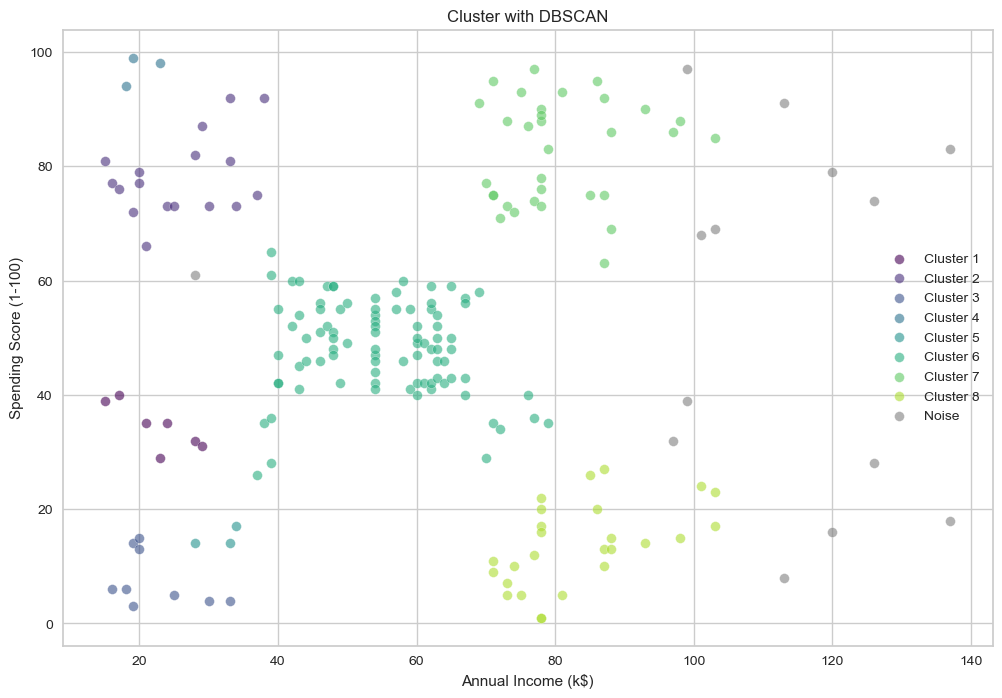

In [80]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

unique_labels = set(labels)
for label in unique_labels:
    
    if label == -1:
        color = 'gray'
        label_name = 'Noise'
    else:
        color = plt.cm.viridis(float(label) / (max(unique_labels) + 1))
        label_name = f'Cluster {label + 1}'

    plt.scatter(X[labels == label, 0], X[labels == label, 1], 
                c=[color], s=50, alpha=0.6, edgecolors='w', marker='o', label=label_name)

plt.title('Cluster with DBSCAN')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()

plt.show()


In [81]:
# Silhouette Score for DBSCAN
silhouette_avg_dbscan = silhouette_score(X, labels)
print(f"Silhouette Score for DBSCAN: {silhouette_avg_dbscan:.2f}")



Silhouette Score for DBSCAN: 0.45
